In [20]:
import numpy as np
import pandas as pd

In [21]:
data = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Pokemon.csv")
data

,SN,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [22]:
data.columns

Index(['SN', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense',
       'Sp. Attack', 'Sp. Defense', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [23]:
new_order = ['SN', 'Name', 'Type 1', 'Type 2', 'Generation', 'Legendary','HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed']
data = data[new_order]
data

,SN,Name,Type 1,Type 2,Generation,Legendary,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed
0,1,Bulbasaur,Grass,Poison,1,False,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,1,False,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,1,False,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,1,False,80,100,123,122,120,80
4,4,Charmander,Fire,NaN,1,False,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,6,True,50,100,150,100,150,50
796,719,DiancieMega Diancie,Rock,Fairy,6,True,50,160,110,160,110,110
797,720,HoopaHoopa Confined,Psychic,Ghost,6,True,80,110,60,150,130,70
798,720,HoopaHoopa Unbound,Psychic,Dark,6,True,80,160,60,170,130,80


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           800 non-null    int64 
 1   Name         800 non-null    object
 2   Type 1       800 non-null    object
 3   Type 2       414 non-null    object
 4   Generation   800 non-null    int64 
 5   Legendary    800 non-null    bool  
 6   HP           800 non-null    int64 
 7   Attack       800 non-null    int64 
 8   Defense      800 non-null    int64 
 9   Sp. Attack   800 non-null    int64 
 10  Sp. Defense  800 non-null    int64 
 11  Speed        800 non-null    int64 
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [25]:
data.describe()

,SN,Generation,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,362.813750,3.32375,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,208.343798,1.66129,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,184.750000,2.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,364.500000,3.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,539.250000,5.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,721.000000,6.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


# K Means Clustering

In [26]:
#Choosing centers for 5 Clusters
#Pichu_Baby
C1 = [20, 40, 15, 35, 35, 60]
#Charmeleon
C2 = [58, 64, 58, 80, 65, 80]
#Arcanine
C3 = [95, 115, 80, 85, 80, 90]
#Dragonite
C4 = [91, 134, 95, 100, 100, 80]
#Arceus
C5 = [120, 120, 120, 120, 120, 120]

centers = [C1, C2, C3, C4, C5]
d = np.zeros(5)

Clus=[[],[],[],[],[]]

x = data.values.tolist()

def Clustering(Clus,x):
  for v in x:
    for i,c in enumerate(centers):
      e=0
      for j in range(6):
        e+= (c[j]-v[5+j])*(c[j]-v[5+j])
      e = np.sqrt(e)
      d[i]=e
    index = np.argmin(d)
    Clus[index].append(v)


def Centering(Clus,centers):
  for j,V in enumerate(Clus):
    TC = [0,0,0,0,0,0]
    for u in V:
      for i in range(6):
        TC[i]+=u[5+i]
    for i in range(6):
      if len(V)!=0:
        TC[i]=TC[i]/len(V)
    centers[j]=TC

iter = 0
miter = 4

while iter<miter:
  for v in Clus:
    v.clear()

  Clustering(Clus,x)
  Centering(Clus,centers)
  iter+=1


#Result

In [27]:
Cluster = ['Pichu', 'Charmeleon', 'Arcanine', 'Dragonite', 'Arceus']

def getCluster(a):
  rd=np.zeros(5)
  for j,v in enumerate(centers):
    e=0
    for i in range(6):
      e+=(v[i]-a[i])*(v[i]-a[i])
    e=np.sqrt(e)
    rd[j]=e
  ind = np.argmin(rd)
  return Cluster[ind]

In [28]:
string = getCluster([75,110,125,100,105,85])#Kommo-o
print(string)

Dragonite


#Visualization

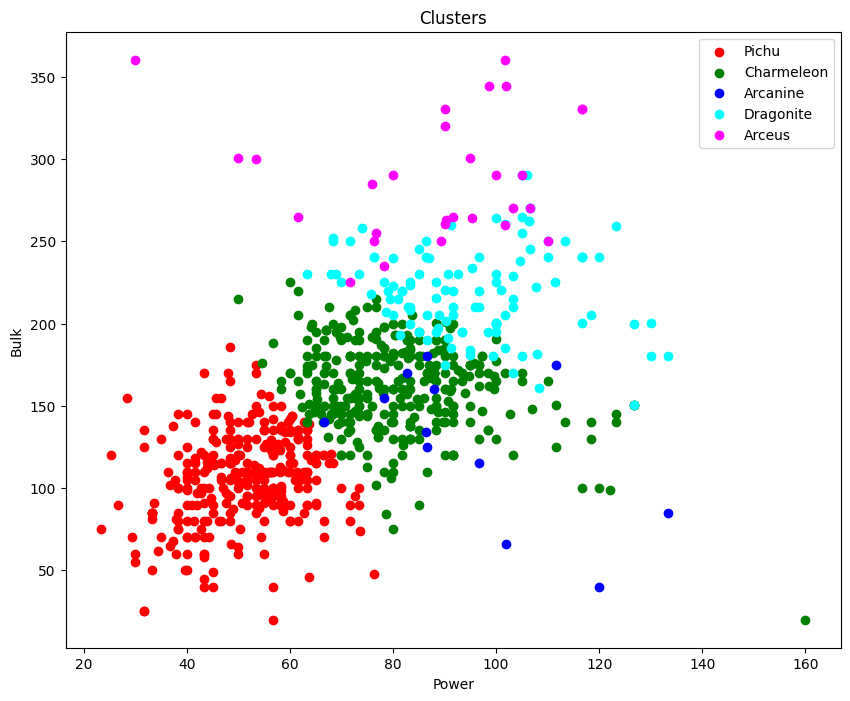

In [51]:
import matplotlib.pyplot as plt

x_axis = [[], [], [], [], []]
y_axis = [[], [], [], [], []]
z_axis = [[], [], [], [], []]
color = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']

for k, C in enumerate(Clus):
    for v in C:
        x_axis[k].append((v[6] + v[8] + v[10]) / 3)
        y_axis[k].append((v[7] + v[9]) + v[5]/ 3)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

for i in range(5):
    ax.scatter(x_axis[i], y_axis[i], c=color[i], label=Cluster[i])

ax.set_xlabel("Power")
ax.set_ylabel("Bulk")
ax.set_title("Clusters")

plt.legend()
plt.show()


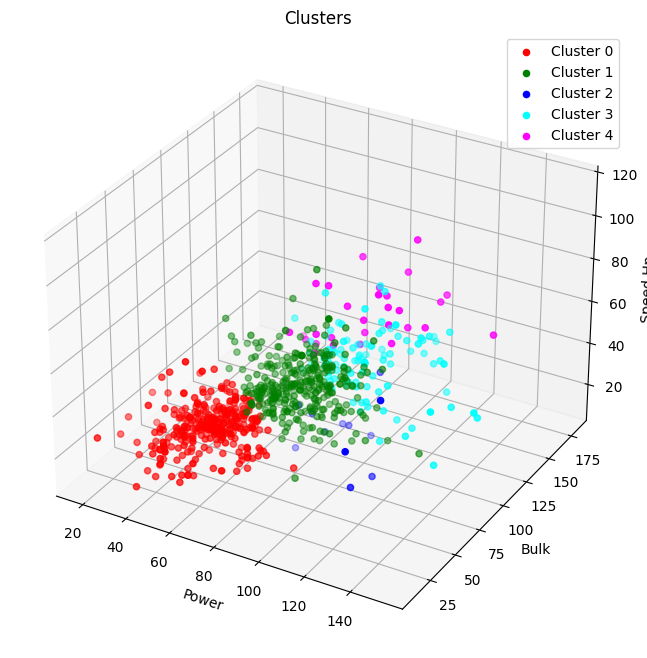

In [52]:
import matplotlib.pyplot as plt

x_axis = [[], [], [], [], []]
y_axis = [[], [], [], [], []]
z_axis = [[], [], [], [], []]
color = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']

for k, C in enumerate(Clus):
    for v in C:
        x_axis[k].append((v[6] + v[8]) / 2)
        y_axis[k].append((v[7] + v[9]) / 2)
        z_axis[k].append((v[5] + v[10]) / 2)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(5):
    ax.scatter(x_axis[i], y_axis[i], z_axis[i],c=color[i], label=f"Cluster {i}")

ax.set_xlabel("Power")
ax.set_ylabel("Bulk")
ax.set_zlabel("Speed Hp")
ax.set_title("Clusters")

plt.legend()
plt.show()
